In [1]:
import pandas as pd
import numpy as np

import io
import bson
import ast
import matplotlib.pyplot as plt
from skimage.io import imread

import glob
import re
from collections import Counter
import pickle

## Extract data

In [79]:
#data = bson.decode_file_iter(open('D:/ADM/Assignments/Assignment_3/train.bson','rb'))

prod_to_category = dict()
pictures = dict()

df = pd.DataFrame(data=None, columns=['category_id'])
pictures_final = pd.Series(data =None)

x =99998
j = 1

for c,d in enumerate(data):
    if j == 31:
        break
    
    elif c <=x:
        #print("inside first if",c)
        pics = list()
        product_id = d['_id']
        category_id = d['category_id']
        prod_to_category[product_id] = category_id
        for e,pic in enumerate(d['imgs']):
            pics.append(pic)
            #pics.append(imread(io.BytesIO(pic['picture'])))

        pictures[product_id] = pics

        #prod_to_category = pd.DataFrame.from_dict(prod_to_category, orient='index')
        #prod_to_category.rename(columns={0:'category_id'}, inplace=True)
        
        #pictures = pd.Series(pictures)
    

    else:
        #print("inside else",c)
        
        
        pics = list()
        product_id = d['_id']
        category_id = d['category_id']
        prod_to_category[product_id] = category_id
        for e,pic in enumerate(d['imgs']):
            pics.append(pic)
            #pics.append(imread(io.BytesIO(pic['picture'])))

        pictures[product_id] = pics

        prod_to_category = pd.DataFrame.from_dict(prod_to_category, orient='index')
        prod_to_category.rename(columns={0:'category_id'}, inplace=True)
        
        pictures = pd.Series(pictures)
        
        
        df = pd.concat([df, prod_to_category])
        pictures_final = pd.concat([pictures_final,pictures])
        
        df_final = pd.concat([df,pictures_final],axis=1)
        #print(df_final)
        df_final.rename(columns={0:'pictures'},inplace=True)
        df_final.index.rename('product_id',inplace = True)
        df_final.to_csv('D:/ADM/Assignments/Assignment_3/Dataset/file_'+str(j)+'.csv')
        
        del(df_final)
        df = pd.DataFrame(data=None, columns=['category_id'])
        pictures_final = pd.Series(data =None)
        
        prod_to_category = dict()
        pictures = dict()
        x+=100000
        print('batch {} over'.format(j))
        j+=1



# #print('final set')       
# prod_to_category = pd.DataFrame.from_dict(prod_to_category, orient='index')
# prod_to_category.rename(columns={0:'category_id'}, inplace=True)
                        
# pictures = pd.Series(pictures)
                     
# df = pd.concat([df, prod_to_category])
                        
# pictures_final = pd.concat([pictures_final,pictures])
# df_final = pd.concat([df,pictures_final],axis=1)
# #print(df_final)
# df_final.rename(columns={0:'pictures'},inplace=True)
# df_final.index.rename('product_id',inplace = True)
# df_final.to_csv('D:/ADM/Assignments/Assignment_3/Dataset/file_'+str(j)+'.csv')
# del(df_final)
# df = pd.DataFrame(data=None, columns=['category_id'])
# pictures_final = pd.Series(data =None)
# prod_to_category = dict()
# pictures = dict()
# print('batch {} over'.format(j))

C:\Users\sdeva\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  import sys
C:\Users\sdeva\anaconda3\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


batch 1 over
batch 2 over
batch 3 over
batch 4 over
batch 5 over
batch 6 over
batch 7 over
batch 8 over
batch 9 over
batch 10 over
batch 11 over
batch 12 over
batch 13 over
batch 14 over
batch 15 over
batch 16 over
batch 17 over
batch 18 over
batch 19 over
batch 20 over
batch 21 over
batch 22 over
batch 23 over
batch 24 over
batch 25 over
batch 26 over
batch 27 over
batch 28 over
batch 29 over
batch 30 over


KeyboardInterrupt: 

In [82]:
df = pd.read_csv('D:/ADM/Assignments/Assignment_3/Dataset/file_1.csv')

In [83]:
df.head()

,product_id,category_id,pictures
0,0,1000010653,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...
1,1,1000010653,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...
2,2,1000004079,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...
3,3,1000004141,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...
4,4,1000015539,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...


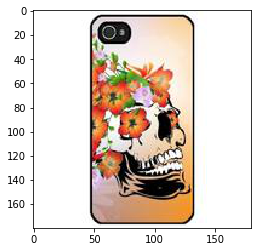

In [84]:
plt.imshow(imread(io.BytesIO(ast.literal_eval(df.iloc[0][2])[0]['picture'])))

In [93]:
df.shape

(100000, 3)

In [94]:
del(df)

In [2]:
file_paths = glob.glob('D:\ADM\Assignments\Assignment_3\Dataset\*.csv')

In [3]:
file_paths

['D:\\ADM\\Assignments\\Assignment_3\\Dataset\\file_1.csv',
 'D:\\ADM\\Assignments\\Assignment_3\\Dataset\\file_10.csv']

In [4]:
df = pd.read_csv(file_paths[1], usecols=['product_id','category_id'])

In [5]:
df.head()

,product_id,category_id
0,2562269,1000014026
1,2562272,1000005902
2,2562274,1000020845
3,2562277,1000004074
4,2562278,1000004184


In [6]:
df1 = df.groupby(['category_id','product_id']).agg(count = ('product_id',len))
df1.head()

count
category_id product_id       
1000000237  2566496         1
            2653131         1
            2684310         1
            2843649         1
1000000239  2641262         1

In [7]:
df2 = df1.reset_index().groupby(['category_id']).agg(count = ('product_id',len)).sort_values(by='count',ascending=False)

In [8]:
df2.head()

,count
category_id,
1000011427,1419
1000014202,1264
1000018296,1200
1000008094,1187
1000011423,1183


In [9]:
df2[df2['count']>170]

,count
category_id,
1000011427,1419
1000014202,1264
1000018296,1200
1000008094,1187
1000011423,1183
...,...
1000010029,176
1000010001,175
1000017771,175


## XSV

In [10]:
from subprocess import PIPE, run

def out(command):
    result = run(command, stdout=PIPE, stderr=PIPE, universal_newlines=True, shell=True)
    return result.stdout

my_output = out("xsv headers D:/ADM/Assignments/Assignment_3/Dataset/file_1.csv")

In [11]:
my_output

'1   product_id\n2   category_id\n3   pictures\n'

In [12]:
category_paths = glob.glob('D:/ADM/Assignments/Assignment_3/Dataset/Category/*.csv')
category_paths

['D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000237.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000239.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000243.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000249.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000251.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000253.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000273.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000282.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000285.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000287.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000289.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_1000000291.csv',
 'D:/ADM/Assignments/Assignment_3/Dataset/Category\\category_100

In [13]:
category = dict()
product = []
j = 1
k = 1
for x in category_paths:
    k+=1
    #print(x)
    row_count = int(out('xsv count '+str(x)))
    #j=1
    if row_count > 100:
        #print(j)
        data = pd.read_csv(x)
        product = data.sample(n=100,random_state=42)
        category[int(re.findall('[0-9]{10}',x)[0])] = product
        #j+=1
    if k/10 == 0:
        print(k)
#print(category)

In [14]:
sample_data = pd.DataFrame(data=None, columns=['product_id','category_id','pictures'])

category_keys = list(category.keys())
for y in category_keys:
    data_val = category[y]
    sample_data = pd.concat([sample_data,data_val])
    del(data_val)

In [15]:
sample_data = sample_data.reset_index(drop=True)

In [92]:
sample_data.head()

,product_id,category_id,pictures
0,2586981,1000001703,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...
1,2572285,1000001703,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...
2,2747344,1000001703,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...
3,2695158,1000001703,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...
4,2677895,1000001703,[{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x0...


In [17]:
pictures_len = dict()
picture_files = []
for t,x in enumerate(sample_data['pictures']):
    pictures_len[t] = len(ast.literal_eval(x))
    temp = ast.literal_eval(x)
    for y in temp:
        picture_files.append(y)

In [72]:
product_id = []
category_id = []
pictures = []
for index,row in sample_data.iterrows():
    for pic in ast.literal_eval(row.pictures):
        product_id.append(row.product_id)
        category_id.append(row.category_id)
        pictures.append(pic)
        #new_dict = {'product_id':row.product_id,'category_id':row.category_id, \
         #                      'pictures':pic}

In [75]:
new_df = pd.concat([pd.Series(category_id),pd.Series(product_id),pd.Series(pictures)],axis=1)

In [78]:
new_df.rename(columns={0:'category_id',1:'product_id',2:'picture'},inplace=True)

In [84]:
new_df

,category_id,product_id,picture
0,1000001703,2586981,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
1,1000001703,2572285,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
2,1000001703,2572285,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
3,1000001703,2747344,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
4,1000001703,2695158,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
...,...,...,...
33249,1000021535,2720744,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
33250,1000021535,2594064,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
33251,1000021535,2594064,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
33252,1000021535,2594064,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...


In [262]:
len(picture_files)

33254

In [260]:
pics_val = list(pictures_len.values())
Counter(pics_val)

Counter({1: 11331, 2: 3056, 3: 1441, 4: 2872})

In [265]:
with open('pictures_pickle','ab') as f:
    pickle.dump(picture_files,f)

In [80]:
with open('final_data','ab') as f:
    pickle.dump(new_df,f)

In [110]:
new_df.reset_index(inplace=True)

In [112]:
new_df.rename(columns={'index':'picture_id'},inplace = True)

In [113]:
new_df

,picture_id,category_id,product_id,picture
0,0,1000001703,2586981,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
1,1,1000001703,2572285,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
2,2,1000001703,2572285,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
3,3,1000001703,2747344,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
4,4,1000001703,2695158,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
...,...,...,...,...
33249,33249,1000021535,2720744,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
33250,33250,1000021535,2594064,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
33251,33251,1000021535,2594064,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...
33252,33252,1000021535,2594064,{'picture': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00...


In [127]:
def save_fig(tup):
    plt.axis('off')
    plt.imshow(imread(io.BytesIO(tup[1]['picture'])))
    plt.savefig('C:/Users/sdeva/1_Programs/ADM/Assignment_3/pictures/{}.png'.format(tup[0]))
